## Simulation Datasets

The simulation datasets for training various ML models for inductive bias experiment are described in this notebook. There are five simulations: gaussian XOR, gaussian rotated XOR, gaussian small XOR (as in smaller variance), uniform XOR, spiral. 

In [1]:
# changing cwd
%cd ..

c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp


## Load packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import seaborn as sns

colors = sns.diverging_palette(150, 275, s=80, l=55, n=2) #green to purple
colors[0], colors[1] = colors[1], colors[0] # switch colors
cmap = 'PRGn'

In [3]:
from src.inductive_bias import IB
ib = IB() #instantiate inductive bias package

In [4]:
ib.load()

[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\SimulationData.pickle ] loaded


In [5]:
kwargs = {'h': 0.01, 'sig':0.25, 'rng':3, 'spirals':1270}

ib.get_posterior(**kwargs)

{'h': 0.01, 'sig': 8e-05, 'rng': 4.3, 'spirals': 270, 'cc': False}



{'h': 0.01, 'sig': 8e-05, 'rng': 4.3, 'spirals': 270, 'cc': True}


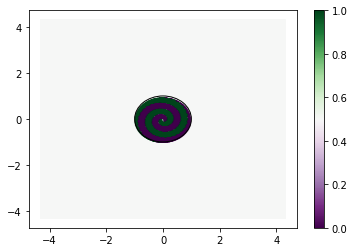

In [7]:
tx, ty, tc = ib.truepst[1][2]

idxT = (abs(tx) <= 3) * (abs(ty) <= 3)

tx = tx[idxT]
ty = ty[idxT]
tc = tc[idxT]

fig, ax = plt.subplots()

mlp = ax.scatter(tx,ty, c=tc, s=1, cmap='PRGn')
fig.colorbar(mlp)
ax.add_patch(Circle((0,0), radius=1, edgecolor='k', fill=False))

## Time and Date of the experiment

In [4]:
print(ib.date)

2021-03-22 21:06:44.013492


## True Posteriors
There are five true posteriors for five simulation dataset

In order to construct true posterior for spiral dataset, the "skeletal" backbone was laid out where gaussian posterior is drawn at each point

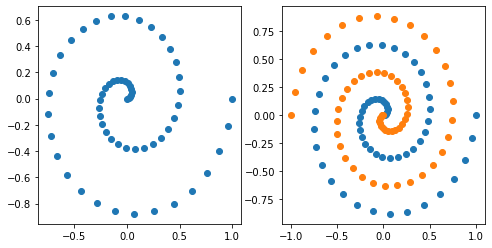

In [23]:
fig, ax = plt.subplots(1,2, figsize=(8,4))

a,b = ib.spiral #N=120, rng=1
ax[0].scatter(a[:,0],a[:,1])
ax[1].scatter(a[:,0],a[:,1])
ax[1].scatter(b[:,0],b[:,1])

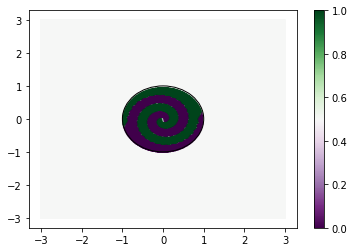

In [6]:
#final output
tx, ty, tc = ib.get_trueSpiral(-3,3,0.01,0.00008,rng=1,cc=True) #sig cannot go lower than 0.00008

fig, ax = plt.subplots()

mlp = ax.scatter(tx,ty, c=tc, s=1, cmap='PRGn')
fig.colorbar(mlp)
ax.add_patch(Circle((0,0), radius=1, edgecolor='k', fill=False))

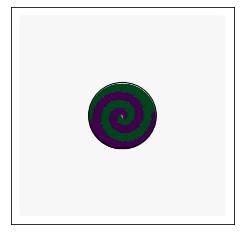

In [7]:
#clean version
fig, ax = plt.subplots(figsize=(4,4))

mlp = ax.scatter(tx,ty, c=tc, s=1, cmap='PRGn')

ax.set_xticks([])
ax.set_yticks([])
ax.add_patch(Circle((0,0), radius=1, edgecolor='k', fill=False))

Previously different ways were explored to construct true posterior for sprial dataset. Below is sampling large number of points from the spiral distribution with gaussian noise. This was not used as there is space between two classes

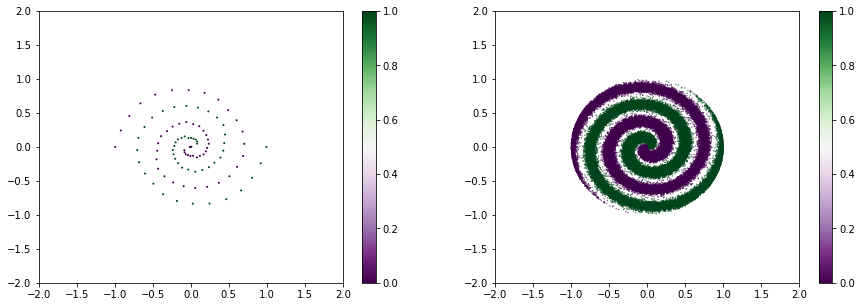

In [31]:
fig, axs = plt.subplots(1,2, figsize=(5*3,5))

a, b, c, d, e, f, g = ib.get_testpdfSpiral(100, noise=0, K=2)#generate_spirals(750, K=2)
mlp = axs[0].scatter(a[:,0],a[:,1], c=c, cmap=cmap, s=1)
plt.colorbar(mlp, ax=axs[0])
axs[0].set_xlim(-2,2);
axs[0].set_ylim(-2,2);

a, b, c, d, e, f, g = ib.get_testpdfSpiral(100000, noise=.9, K=2)#generate_spirals(750, K=2)
mlp = axs[1].scatter(a[:,0],a[:,1], c=c, cmap=cmap, s=0.1)
plt.colorbar(mlp, ax=axs[1])
axs[1].set_xlim(-2,2);
axs[1].set_ylim(-2,2);

True posterior for guassian XOR embedded in a unit square

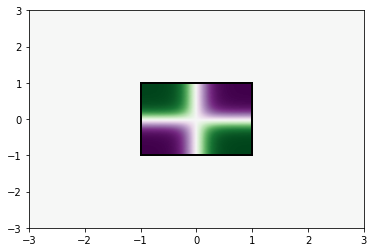

In [10]:
h = 0.01
tempX, tempY, tempC = ib.get_trueXOR(l=-3, r=3, h=h, rotate=False, sig=0.25)

fig, axs = plt.subplots(1,1)

axs.set_xlim(np.multiply([-3,3], 1))
axs.set_ylim(np.multiply([-3,3], 1)) 
axs.scatter(tempX, tempY, c=tempC, s=1, cmap=cmap)
axs.add_patch(Rectangle((-1,-1), 2, 2, linewidth=2, edgecolor='k', fill=False))

True posterior for guassian XOR embedded in a unit circle

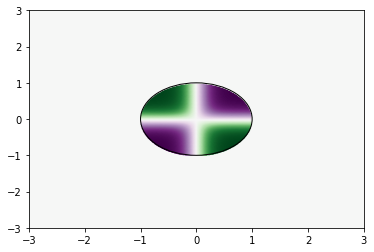

In [11]:
h = 0.01
tempX, tempY, tempC = ib.get_trueXOR(l=-3,r=3, h=h, rotate=False, sig=0.25, cc=True)

fig, axs = plt.subplots(1,1)

axs.set_xlim(np.multiply([-3,3], 1))
axs.set_ylim(np.multiply([-3,3], 1)) 
axs.scatter(tempX, tempY, c=tempC, s=1, cmap=cmap)
axs.add_patch(Circle((0,0), radius=1, edgecolor='k', fill=False))

True posterior for uniform XOR embedded in a unit square

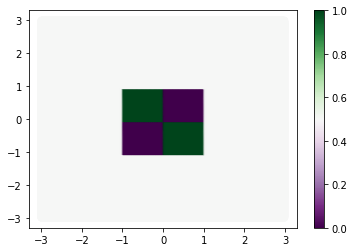

In [12]:
h = 0.01
tempX, tempY, tempC = ib.get_trueUXOR(l=-3, r=3, h=h)
plt.scatter(tempX, tempY, c=tempC, cmap=cmap)
plt.colorbar()

True posterior for uniform XOR embedded in a unit circle

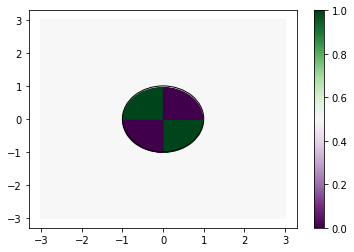

In [13]:
h = 0.01
tempX, tempY, tempC = ib.get_trueUXOR(l=-3, r=3, h=h, cc=True)
fig, axs = plt.subplots(1,1)

pms = axs.scatter(tempX, tempY, c=tempC, s=1, cmap=cmap)
axs.add_patch(Circle((0,0), radius=1, edgecolor='k', fill=False))
fig.colorbar(pms)

## Importing dataset loader

In [1]:
# changing cwd
%cd ..
from src.dataset_loader import datasetLoader
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import seaborn as sns

colors = sns.diverging_palette(150, 275, s=80, l=55, n=2) #green to purple
colors[0], colors[1] = colors[1], colors[0] # switch colors
cmap = 'PRGn'

c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp


In [2]:
dloader = datasetLoader()
dloader.generate(N=100, rng=1, cov=1)

In [7]:
#dataloader can either load from pickle file or save current attributes to pickle file
dloader.load(save=False)

creating new datasets..
completed after 0 seconds
saved as [ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\SimulationData.pickle ]


## Training simulation datasets sampled within a unit square

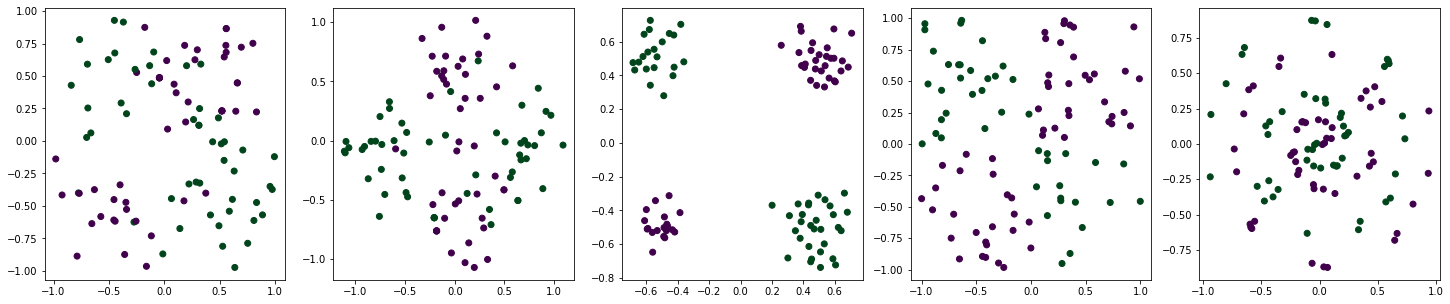

In [3]:
fig, axs = plt.subplots(1,5,figsize=(5*5,5))

for i in range(5):
    axs[i].scatter(dloader.train_X[i][:,0],dloader.train_X[i][:,1], c=dloader.train_y[i], cmap=cmap)

## Training simulation datasets sampled within a unit circle

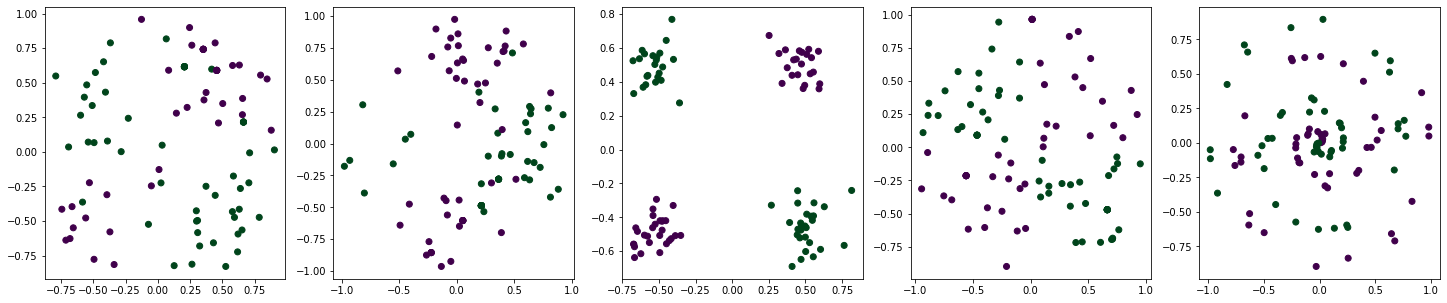

In [4]:
fig, axs = plt.subplots(1,5,figsize=(5*5,5))

for i in range(5):
    axs[i].scatter(dloader.Ctrain_X[i][:,0],dloader.Ctrain_X[i][:,1], c=dloader.Ctrain_y[i], cmap=cmap)

## Testing simulation datasets sampled within a unit square

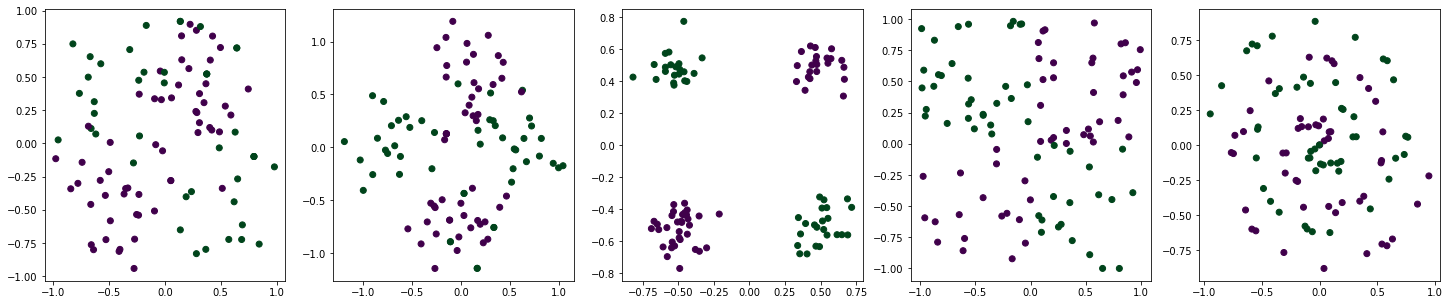

In [5]:
fig, axs = plt.subplots(1,5,figsize=(5*5,5))

for i in range(5):
    axs[i].scatter(dloader.test_X[i][:,0],dloader.test_X[i][:,1], c=dloader.test_y[i], cmap=cmap)

## Testing simulation datasets sampled within a unit circle

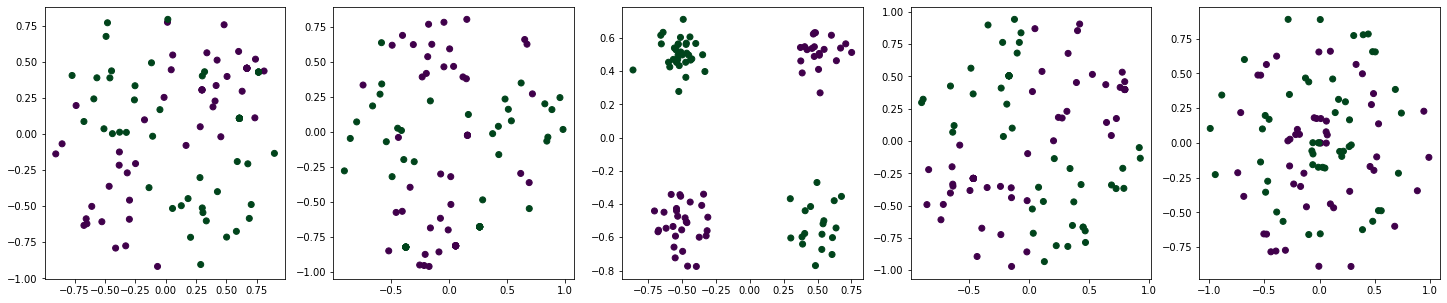

In [6]:
fig, axs = plt.subplots(1,5,figsize=(5*5,5))

for i in range(5):
    axs[i].scatter(dloader.Ctest_X[i][:,0],dloader.Ctest_X[i][:,1], c=dloader.Ctest_y[i], cmap=cmap)